<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#how-many-people?" data-toc-modified-id="how-many-people?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>how many people?</a></span><ul class="toc-item"><li><span><a href="#or-...." data-toc-modified-id="or-....-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>or ....</a></span></li></ul></li><li><span><a href="#Union-of-sets" data-toc-modified-id="Union-of-sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Union of sets</a></span></li><li><span><a href="#Neighbors-and-degree-distribution" data-toc-modified-id="Neighbors-and-degree-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neighbors and degree distribution</a></span></li><li><span><a href="#But-this-seems-not-correct....." data-toc-modified-id="But-this-seems-not-correct.....-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>But this seems not correct.....</a></span></li><li><span><a href="#What-is-going-on?" data-toc-modified-id="What-is-going-on?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What is going on?</a></span></li><li><span><a href="#What-did-we-miss-out?" data-toc-modified-id="What-did-we-miss-out?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>What did we miss out?</a></span></li><li><span><a href="#What-do-we-see?" data-toc-modified-id="What-do-we-see?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>What do we see?</a></span></li><li><span><a href="#Plot-the-distribution-of-the-distances" data-toc-modified-id="Plot-the-distribution-of-the-distances-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the distribution of the distances</a></span></li><li><span><a href="#Lets-break-the-distance-down" data-toc-modified-id="Lets-break-the-distance-down-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Lets break the distance down</a></span></li></ul></div>

In [1]:
# fetch the data
#!git clone git@github.com:skissler/haslemere.git

In [2]:
import pandas as pd
import networkx as nx
%matplotlib inline

In [3]:
%ls haslemere/

Kissler_DataS1.csv   Kissler_MovieS1.mov  README.md
Kissler_DataS2.csv   Kissler_SI.pdf


__DataS1.csv__ The “Haslemere dataset”, consisting of pairwise distances between users of the BBC Pandemic Haslemere app over time. Each row consists of an encounter (within 50m) between two users. 

* Column 1 gives the time step as an integer value (see DataS2.csv for conversion to real time). 
* Columns 2 and 3 give the user ID numbers. 
* Column 4 gives the distance between the users at that time step, rounded to the nearest metre. 

__DataS2.csv__ Conversion between the time indices in column 3 of the Haslemere dataset (see Supplemental Materials and Methods) and real time, in British Standard Time (BST).


In [4]:
DataS1= pd.read_csv('haslemere/Kissler_DataS1.csv', header=None)

print(DataS1.shape)
DataS1.columns=['time','s','t','meters']
DataS1.head()

(102831, 4)


time  s    t  meters
0     1  1  390      17
1     1  2  215       9
2     1  2  246      18
3     1  2  265      45
4     1  5  367      32

In [5]:
DataS2= pd.read_csv('haslemere/Kissler_DataS2.csv', header=None)
print(DataS2.shape)
print(DataS2.head(),'\n...\n', DataS2.tail())

(576, 2)
   0                         1
0  1  Thu 12 Oct 2017 07:00:00
1  2  Thu 12 Oct 2017 07:05:00
2  3  Thu 12 Oct 2017 07:10:00
3  4  Thu 12 Oct 2017 07:15:00
4  5  Thu 12 Oct 2017 07:20:00 
...
        0                         1
571  572  Sat 14 Oct 2017 22:35:00
572  573  Sat 14 Oct 2017 22:40:00
573  574  Sat 14 Oct 2017 22:45:00
574  575  Sat 14 Oct 2017 22:50:00
575  576  Sat 14 Oct 2017 22:55:00


# how many people?

In [38]:
# how many people?
len(set(DataS1.s)) # take the column, turn into a set, count
# more fancy DataS1.s.unique().shape,

443

## or ....

In [39]:
DataS1.t.unique().shape

(446,)

# Union of sets

* <https://nl.wikipedia.org/wiki/Vereniging_(verzamelingenleer)>

$$ A\cup B = \{ x \mid x\in A \mbox{ of } x\in B\}$$

![](https://upload.wikimedia.org/wikipedia/commons/2/2f/Venn_A_union_B.png)

In [41]:
len(set(DataS1.s )
    |                         # vereniging  (let op & is doorsnede)
    set( DataS1.t)
   )

469

# Neighbors and degree distribution

In [42]:
# find the neighbors of each source node

DataS1.groupby('s')['t'].unique()

s
1      [390, 234, 389, 4, 127, 172, 184, 415, 459, 20...
2      [215, 246, 265, 21, 237, 436, 409, 459, 331, 1...
3      [4, 234, 389, 131, 267, 192, 84, 355, 65, 411,...
4      [49, 326, 19, 6, 217, 272, 175, 123, 305, 237,...
5      [367, 430, 39, 64, 280, 236, 334, 286, 78, 266...
                             ...                        
454                                                [467]
456                                      [465, 457, 461]
457                                                [467]
459                            [468, 462, 464, 463, 467]
461                                                [465]
Name: t, Length: 443, dtype: object

In [43]:
# degree distribution: simply count the number of neighbors

degree= DataS1.groupby('s')['t'].unique().str.len()
degree

s
1      51
2      29
3      14
4      58
5      20
       ..
454     1
456     3
457     1
459     5
461     1
Name: t, Length: 443, dtype: int64

In [11]:
# degree distribution

degree.sort_values(ascending=False)

s
44     90
147    85
153    79
26     75
57     72
       ..
315     1
436     1
437     1
278     1
461     1
Name: t, Length: 443, dtype: int64

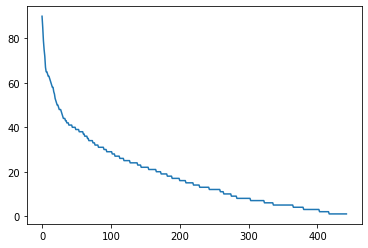

In [12]:
# degree distribution

degree.sort_values(ascending=False).reset_index()['t'].plot();

# But this seems not correct.....

* relation is symmetric (have met each other)
* but not coded symmetric...
* detective work

In [13]:
DataS1.groupby('t')['s'].unique().head()

t
2        [1]
4     [3, 1]
6     [4, 5]
10       [8]
13       [4]
Name: s, dtype: object

In [14]:
DataS1.groupby('s')['t'].unique().head()

s
1    [390, 234, 389, 4, 127, 172, 184, 415, 459, 20...
2    [215, 246, 265, 21, 237, 436, 409, 459, 331, 1...
3    [4, 234, 389, 131, 267, 192, 84, 355, 65, 411,...
4    [49, 326, 19, 6, 217, 272, 175, 123, 305, 237,...
5    [367, 430, 39, 64, 280, 236, 334, 286, 78, 266...
Name: t, dtype: object

# What is going on?

* They store the ids of people with higher id!
* Thus we need to add both lists!
    * database join

In [15]:
# check how many has person 2
print(DataS1.groupby('s')['t'].unique().str.len().loc[2])
DataS1.groupby('t')['s'].unique().str.len().loc[2]

29


1

1    53
2    30
3    16
4    60
5    22
dtype: int64


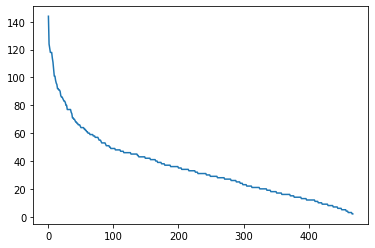

In [16]:
# do the join
samen=pd.DataFrame(DataS1.groupby('s')['t'].unique()).join(
    pd.DataFrame(DataS1.groupby('t')['s'].unique()),
    how='outer')
# empty places have to be filled with the empty list
samen.fillna('[]', inplace=True)
# now add the lengths
realdegree=samen['s'].str.len()+samen['t'].str.len() 
# check
print(realdegree.head())
# new better plot
realdegree.sort_values(ascending=False).reset_index()[0].plot( );

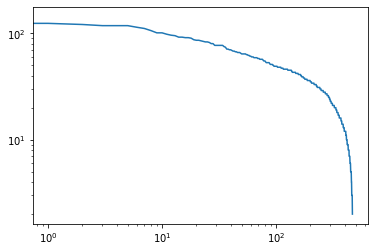

In [17]:
# power law?  rich get richer

realdegree.sort_values(ascending=False).reset_index()[0].plot(loglog=True);

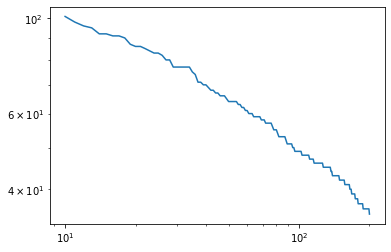

In [18]:
# power law?  if we cut off the extremes?
# Yes!
realdegree.sort_values(ascending=False).reset_index()[0].loc[10:200].plot(loglog=True);

# What did we miss out?

* How often people met?
* How close they where

degree of node 2 is  30


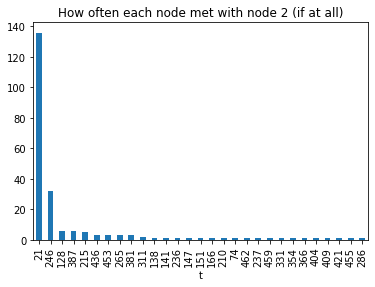

In [19]:
print("degree of node 2 is ",realdegree.loc[2])

# for each one, compute how often they met

DataS1.groupby(['s','t'])['time'].count().loc[2].sort_values(ascending=False).plot(kind='bar',
               title='How often each node met with node 2 (if at all)'); 

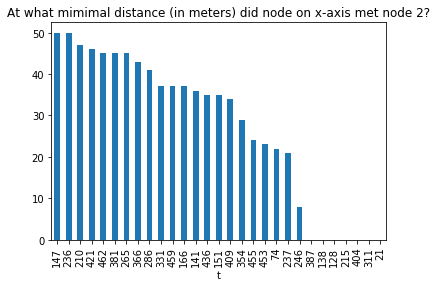

In [20]:
# for each person node 2 met, what was the minimum distance they met?

DataS1.groupby(['s','t'])['meters'].min().loc[2].sort_values(ascending=False).plot(kind='bar',
               title='At what mimimal distance (in meters) did node on x-axis met node 2?' ); 

In [21]:
# let s join the two graphs for node 2 and order on distance (3)

pd.DataFrame(DataS1.groupby(['s','t'])['meters'].min().loc[2]).join(
    pd.DataFrame(DataS1.groupby(['s','t'])['time'].count().loc[2])).sort_values('meters')

meters  time
t                
21        0   136
311       0     2
404       0     1
215       0     5
128       0     6
138       0     1
387       0     6
246       8    32
237      21     1
74       22     1
453      23     3
455      24     1
354      29     1
409      34     1
151      35     1
436      35     3
141      36     1
166      37     1
459      37     1
331      37     1
286      41     1
366      43     1
265      45     3
381      45     3
462      45     1
421      46     1
210      47     1
236      50     1
147      50     1

# What do we see?

* The more you see someone, the higher the chance that you see her at close distance
* obvious right ;-)

# Plot the distribution of the distances

In [22]:
import seaborn as sns

In [23]:
DataS1['meters'].describe()

count    102831.000000
mean         24.941467
std          16.273681
min           0.000000
25%           9.000000
50%          27.000000
75%          40.000000
max          50.000000
Name: meters, dtype: float64

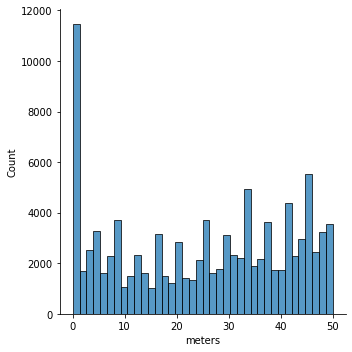

In [24]:
# how often each distance occurs
sns.displot(DataS1.meters);

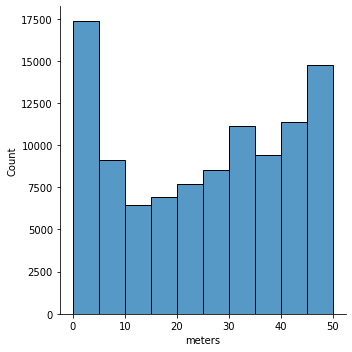

In [25]:
# make 10 bins
sns.displot(DataS1['meters'],bins=10);

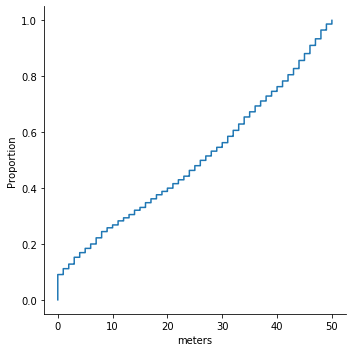

In [26]:
# cumulative view
sns.displot(DataS1.meters, kind='ecdf' );

# Lets break the distance down

* dangerous
* tricky
* safe

In [27]:
DataS1.meters<= 2

0         False
1         False
2         False
3         False
4         False
          ...  
102826    False
102827    False
102828     True
102829     True
102830    False
Name: meters, Length: 102831, dtype: bool

In [28]:
def distance(m):
    if m<=2:
        return "dangerous"
    elif m <=5:
        return "tricky"
    else:
        return 'safe'
    
DataS1['distance']= DataS1.meters.apply(lambda m: distance(m))
DataS1.distance.value_counts()

safe         83900
dangerous    13146
tricky        5785
Name: distance, dtype: int64

In [29]:
# percentage of each encounter
round(100* DataS1.distance.value_counts()/DataS1.shape[0],1)

safe         81.6
dangerous    12.8
tricky        5.6
Name: distance, dtype: float64

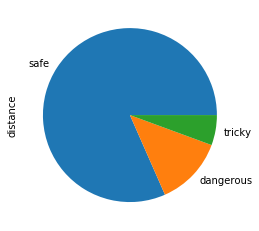

In [30]:
round(100* DataS1.distance.value_counts()/DataS1.shape[0],1).plot(kind='pie');